# Computational Finance Lab 1 

In [6]:

import numpy as np
from math import comb
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:

# constants
S0 = 50
K = 50
T = 1
r = 0.08
sigma = 0.3


The written functions value options for both cases depending on the parameters passed


In [8]:

def european_call(M, table = False, alter = False):
    '''
        Values an european call option
        
        :table: 
        Decides whether the function returns the inital value
        or the entire valuation table

        :alter:
        Determines if the used values correspond to case 2 or not
    '''
    
    delta = T/M
    if not alter:
        u = np.exp(sigma*np.sqrt(delta))
        d = np.exp(-sigma*np.sqrt(delta))
    else:
        beta = 0.5*(np.exp(-r*delta) + np.exp((r + sigma*sigma)*delta))
        u = beta + np.sqrt(beta**2 - 1)
        d = beta - np.sqrt(beta**2 - 1)
    q = (np.exp(r*delta) - d)/(u-d)
    
    if not table:
        V = 0
        for i in range(M+1):
            Si = S0*(u**i)*(d**(M-i))
            V+= comb(M,i)*max(Si - K, 0)*(q**i)*((1-q)**(M-i))*np.exp(-r*delta*M)
        return V     
    else :
        V = []
        for i in reversed(range(M+1)):
            V.append([])
            for j in range(i+1):
                Si = S0*(u**j)*(d**(i-j))
                if i != M:
                    V_new = np.exp(-r*delta)*(V[-2][j]*(1-q) + V[-2][j+1]*q)
                else :
                    V_new = max(Si - K,0)
                V[-1].append(V_new)
        return V
    
    

In [9]:
def european_put(M, table = False, alter = False):
    '''
        Values an european put option
        
        :table: 
        Decides whether the function returns the inital value
        or the entire valuation table

        :alter:
        Determines if the used values correspond to case 2 or not
    '''
    
    delta = T/M
    if not alter:
        u = np.exp(sigma*np.sqrt(delta))
        d = np.exp(-sigma*np.sqrt(delta))
    else:
        beta = 0.5*(np.exp(-r*delta) + np.exp((r + sigma*sigma)*delta))
        u = beta + np.sqrt(beta**2 - 1)
        d = beta - np.sqrt(beta**2 - 1)
    q = (np.exp(r*delta) - d)/(u-d)

    
    if not table:
        V = 0
        for i in range(M+1):
            Si = S0*(u**i)*(d**(M-i))
            V+= comb(M,i)*max(K - Si, 0)*(q**i)*((1-q)**(M-i))*np.exp(-r*delta*M)
        return V     
    else :
        V = []
        for i in reversed(range(M+1)):
            V.append([])
            for j in range(i+1):
                Si = S0*(u**j)*(d**(i-j))
                if i != M:
                    V_new = np.exp(-r*delta)*(V[-2][j]*(1-q) + V[-2][j+1]*q)
                else :
                    V_new = max(K-Si,0)
                V[-1].append(V_new)
        return V
    
    

In [10]:
def american_put(M, table = False, alter = False):
    '''
        Values an american put option
        
        :table: 
        Decides whether the function returns the inital value
        or the entire valuation table

        :alter:
        Determines if the used values correspond to case 2 or not
    '''
    
    delta = T/M
    if not alter:
        u = np.exp(sigma*np.sqrt(delta))
        d = np.exp(-sigma*np.sqrt(delta))
    else:
        beta = 0.5*(np.exp(-r*delta) + np.exp((r + sigma*sigma)*delta))
        u = beta + np.sqrt(beta**2 - 1)
        d = beta - np.sqrt(beta**2 - 1)
    q = (np.exp(r*delta) - d)/(u-d)


    V = []
    for i in reversed(range(M+1)):
        V.append([])
        for j in range(i+1):
            Si = S0*(u**j)*(d**(i-j))
            if i != M:
                V_new = max(max(K-Si,0), np.exp(-r*delta)*(V[-2][j]*(1-q) + V[-2][j+1]*q))
            else :
                V_new = max(K-Si,0)
            V[-1].append(V_new)

    if table:
        return V
    else:
        return V[-1][0]
    

In [11]:

def american_call(M, table = False, alter = False):
    '''
        Values a american call option
        
        :table: 
        Decides whether the function returns the inital value
        or the entire valuation table

        :alter:
        Determines if the used values correspond to case 2 or not
    '''
    
    delta = T/M
    if not alter:
        u = np.exp(sigma*np.sqrt(delta))
        d = np.exp(-sigma*np.sqrt(delta))
    else:
        beta = 0.5*(np.exp(-r*delta) + np.exp((r + sigma*sigma)*delta))
        u = beta + np.sqrt(beta**2 - 1)
        d = beta - np.sqrt(beta**2 - 1)
    q = (np.exp(r*delta) - d)/(u-d)
    V = []
    for i in reversed(range(M+1)):
        V.append([])
        for j in range(i+1):
            Si = S0*(u**j)*(d**(i-j))
            if i != M:
                V_new = max(max(Si-K,0), np.exp(-r*delta)*(V[-2][j]*(1-q) + V[-2][j+1]*q))
            else :
                V_new = max(Si-K,0)
            V[-1].append(V_new)
    
    if table:
        return V
    else:
        return V[-1][0]


The valuation values obtained for case 1 of u and d are as follows - 

In [12]:

for M in [5,10,20]:
    print(f"For M = {M}")
    print(f"The value of the european call is {european_call(M)}")
    print(f"The value of the european put is {european_put(M)}")
    print(f"The value of the american call is {american_call(M)}")
    print(f"The value of the american put is {american_put(M)}\n")


For M = 5
The value of the european call is 8.111627932361564
The value of the european put is 4.267445251693331
The value of the american call is 8.111627932361564
The value of the american put is 4.642821439425159

For M = 10
The value of the european call is 7.70977714182394
The value of the european put is 3.865594461155707
The value of the american call is 7.709777141823944
The value of the american put is 4.3871710867737574

For M = 20
The value of the european call is 7.78217241124076
The value of the european put is 3.9379897305725104
The value of the american call is 7.782172411240762
The value of the american put is 4.422357441877595



Note that the american call and european call options have the same calculated value as would be expected theoretically, whereas the american put is more expensive than the european put option.

Similary for case 2 of u and d we have

In [13]:

for M in [5,10,20]:
    print(f"For M = {M}")
    print(f"The value of the european call is {european_call(M, alter = True)}")
    print(f"The value of the european put is {european_put(M, alter = True)}")
    print(f"The value of the american call is {american_call(M, alter = True)}")
    print(f"The value of the american put is {american_put(M, alter = True)}\n")


For M = 5
The value of the european call is 8.220521272380624
The value of the european put is 4.376338591712393
The value of the american call is 8.220521272380624
The value of the american put is 4.752317201462388

For M = 10
The value of the european call is 7.760154720554708
The value of the european put is 3.915972039886477
The value of the american call is 7.76015472055471
The value of the american put is 4.438304598531006

For M = 20
The value of the european call is 7.807699418914492
The value of the european put is 3.963516738246241
The value of the american call is 7.807699418914495
The value of the american put is 4.4481374334685055



## Q2

For case 1 we have the following tabulated values - 

In [14]:

print(f"For M = {20} the tabulated values are")
t_list = [0, 0.25, 0.5, 0.75, 0.95]

european_call_table = european_call(20, True)
european_put_table = european_put(20, True)
american_call_table = american_call(20, True)
american_put_table = american_put(20, True)

table_list = [european_call_table,european_put_table, american_call_table, american_put_table]
table_names = ["european call", "european put", "american call", "american put"]
for i in range(4):
    table = table_list[i]
    print(f"\nFor pricing the {table_names[i]} the table is as follows - \n")
    for t in t_list:
        t_index = int(t*20)
        print(f"For t = {t} we have {table[-t_index-1]}")



For M = 20 the tabulated values are

For pricing the european call the table is as follows - 

For t = 0 we have [7.782172411240762]
For t = 0.25 we have [0.7125955936663955, 2.0056887483573114, 4.595766424463896, 8.913679682543524, 15.138339366996487, 23.206509912934017]
For t = 0.5 we have [0.0, 0.008721805886560808, 0.10146460530882682, 0.5609820132367715, 1.9809496810604104, 5.090270230264619, 10.337660348837023, 17.676252191951107, 26.793970067526185, 37.47897880644748, 49.75258912075157]
For t = 0.75 we have [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.25022796994767915, 1.7236979261335847, 5.662218239978686, 12.304762343885434, 20.915762998466633, 30.955725389737918, 42.437230012655206, 55.567254137116, 70.58249292078672, 87.7536263165457]
For t = 0.95 we have [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.6687608354187753, 11.345886472252392, 20.1252971966048, 30.165259587876097, 41.646764210793386, 54.77678833525416, 69.79202711892486, 86.96316051468385, 106.5997328225182, 129.05573

Similarly for case 2 we get -

In [15]:

print(f"For M = {20} the tabulated values are")
t_list = [0, 0.25, 0.5, 0.75, 0.95]

european_call_table = european_call(20, True, True)
european_put_table = european_put(20, True, True)
american_call_table = american_call(20, True, True)
american_put_table = american_put(20, True, True)

table_list = [european_call_table,european_put_table, american_call_table, american_put_table]
table_names = ["european call", "european put", "american call", "american put"]
for i in range(4):
    table = table_list[i]
    print(f"\nFor pricing the {table_names[i]} the table is as follows - \n")
    for t in t_list:
        t_index = int(t*20)
        print(f"For t = {t} we have {table[-t_index-1]}")



For M = 20 the tabulated values are

For pricing the european call the table is as follows - 

For t = 0 we have [7.807699418914495]
For t = 0.25 we have [0.7138300202932913, 2.0105996612820944, 4.610137469449958, 8.947211608658538, 15.204186602222496, 23.320038268510306]
For t = 0.5 we have [0.0, 0.008728366320539216, 0.10161990663268472, 0.5622613794798234, 1.9868784479721193, 5.108887116466513, 10.381755988737607, 17.76136619612134, 26.936343286568786, 37.695479112868846, 50.06211119327087]
For t = 0.75 we have [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.25095151509232666, 1.7299081929187516, 5.686255648434517, 12.3638804314572, 21.026336634731404, 31.132811146421357, 42.69768466505184, 55.93140917969032, 71.0748056247284, 88.40344622306687]
For t = 0.95 we have [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.6856603263620884, 11.40388258060771, 20.23587083286958, 30.34234534455953, 41.90721886319, 55.140943377828485, 70.28433982286656, 87.61298042120504, 107.44220341462247, 130.132851436

## Q3

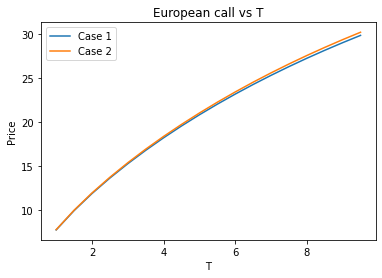

In [16]:

option_value_list = []
option_value_list_2 = []
for T_var in np.arange(1,10,0.5):
    T = T_var
    option_value_list.append(european_call(20))
    option_value_list_2.append(european_call(20, alter = True))
    
    
plt.plot(np.arange(1,10,0.5), option_value_list, label = "Case 1")
plt.plot(np.arange(1,10,0.5), option_value_list_2, label = "Case 2")
plt.ylabel("Price")
plt.xlabel("T")
plt.legend()
plt.title("European call vs T")
plt.show()


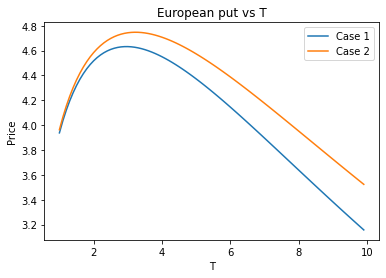

In [17]:

option_value_list = []
option_value_list_2 = []
for T_var in np.arange(1,10,0.1):
    T = T_var
    option_value_list.append(european_put(20))
    option_value_list_2.append(european_put(20, alter = True))
    
    
plt.plot(np.arange(1,10,0.1), option_value_list, label = "Case 1")
plt.plot(np.arange(1,10,0.1), option_value_list_2, label = "Case 2")
plt.ylabel("Price")
plt.xlabel("T")
plt.legend()
plt.title("European put vs T")
plt.show()


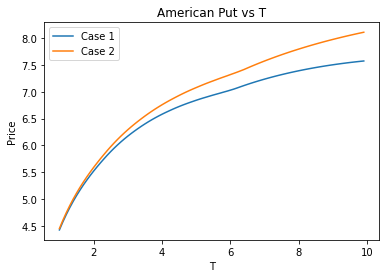

In [18]:

option_value_list = []
option_value_list_2 = []
for T_var in np.arange(1,10,0.1):
    T = T_var
    option_value_list.append(american_put(20))
    option_value_list_2.append(american_put(20, alter = True))
    
    
plt.plot(np.arange(1,10,0.1), option_value_list, label = "Case 1")
plt.plot(np.arange(1,10,0.1), option_value_list_2, label = "Case 2")
plt.ylabel("Price")
plt.xlabel("T")
plt.legend()
plt.title("American Put vs T")
plt.show()

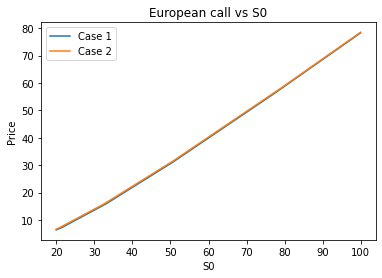

In [19]:

option_value_list = []
option_value_list_2 = []
for S0_var in np.arange(20,100,0.1):
    S0 = S0_var
    option_value_list.append(european_call(20))
    option_value_list_2.append(european_call(20, alter = True))
    
    
plt.plot(np.arange(20,100,0.1), option_value_list, label = "Case 1")
plt.plot(np.arange(20,100,0.1), option_value_list_2, label = "Case 2")
plt.ylabel("Price")
plt.xlabel("S0")
plt.legend()
plt.title("European call vs S0")
plt.show()



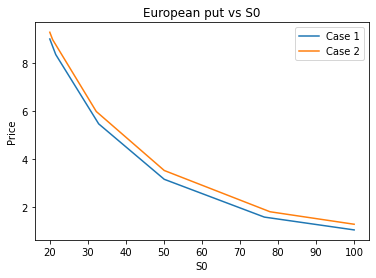

In [20]:

option_value_list = []
option_value_list_2 = []
for S0_var in np.arange(20,100,0.01):
    S0 = S0_var
    option_value_list.append(european_put(20))
    option_value_list_2.append(european_put(20, alter = True))
    
    
plt.plot(np.arange(20,100,0.01), option_value_list, label = "Case 1")
plt.plot(np.arange(20,100,0.01), option_value_list_2, label = "Case 2")
plt.ylabel("Price")
plt.xlabel("S0")
plt.legend()
plt.title("European put vs S0")
plt.show()


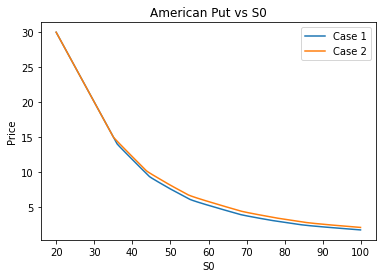

In [21]:


option_value_list = []
option_value_list_2 = []
for S0_var in np.arange(20,100,0.1):
    S0 = S0_var
    option_value_list.append(american_put(20))
    option_value_list_2.append(american_put(20, alter = True))
    
    
plt.plot(np.arange(20,100,0.1), option_value_list, label = "Case 1")
plt.plot(np.arange(20,100,0.1), option_value_list_2, label = "Case 2")
plt.ylabel("Price")
plt.xlabel("S0")
plt.legend()
plt.title("American Put vs S0")
plt.show()
